# Test Case - What if prices get increased by 30%?

In [1]:
import os
import sys
sys.path.append('..')

SAVE_PATH = '../reports/figures/test_case_increased_prices'
os.makedirs(SAVE_PATH, exist_ok=True)

## Simulate Passengers Demand

In [2]:
from src.robin.kernel.entities import Kernel

path_config_supply = '../configs/test_case/supply_data_increased_prices.yml'
path_config_demand = '../configs/test_case/demand_data.yml'
path_output_csv = '../data/test_case/output_increased_prices.csv'

os.makedirs('../data/test_case', exist_ok=True)
seed = 0

kernel = Kernel(path_config_supply, path_config_demand, seed)
services = kernel.simulate(output_path=path_output_csv, departure_time_hard_restriction=True)

## Plot Results

In [3]:
from src.robin.plotter.entities import KernelPlotter

kernel_plotter = KernelPlotter(
    path_output_csv=path_output_csv,
    path_config_supply=path_config_supply
)

In [4]:
kernel_plotter.plotter_data_analysis()

Data from demand plot: 
	Status: El usuario encontró algún servicio que cumplía sus necesidades, pero no pudo comprarlo - Passengers: 3294
	Status: El usuario no encontró ningún servicio que cumpliera sus necesidades - Passengers: 1499
	Status: El usuario compró un servicio que no era el de mayor utilidad - Passengers: 970
	Status: El usuario compró el servicio con mayor utilidad - Passengers: 770

Data from pie chart: 
	Total tickets sold:  1740
	Percentage of tickets sold by seat type: 
		Seat: Basico - Passengers: 1417 - Percentage: 81.44 %
		Seat: Elige - Passengers: 9 - Percentage: 0.52 %
		Seat: Premium - Passengers: 314 - Percentage: 18.05 %

Data from plot tickets sold by purchase day: 
	Total tickets sold:  1740
	Tickets sold by purchase date and seat type: 
		Date: 2023-05-25
			Seat: Elige - Number of tickets sold: 1
			Seat: Premium - Number of tickets sold: 1
		Date: 2023-05-26
			Seat: Basico - Number of tickets sold: 1
			Seat: Premium - Number of tickets sold: 10
		Date

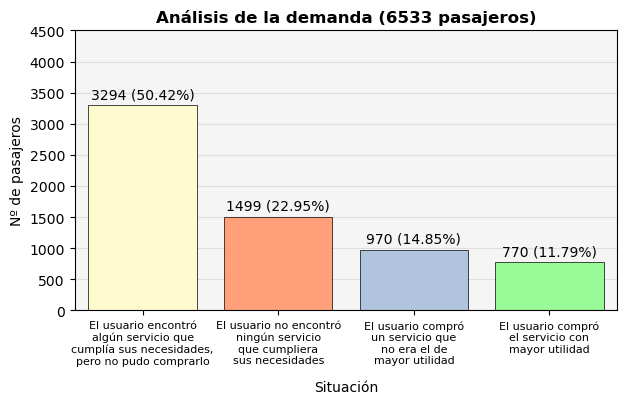

In [5]:
kernel_plotter.plot_demand_status(y_limit=4500, save_path=f'{SAVE_PATH}/demand_status.png')

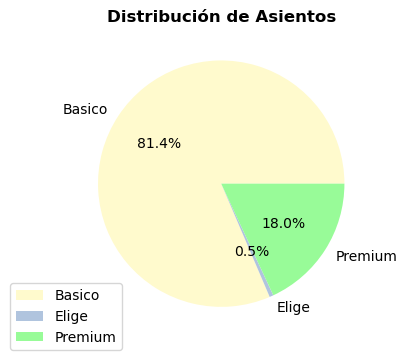

In [6]:
kernel_plotter.plot_seat_distribution_pie_chart(save_path=f'{SAVE_PATH}/pie.png')

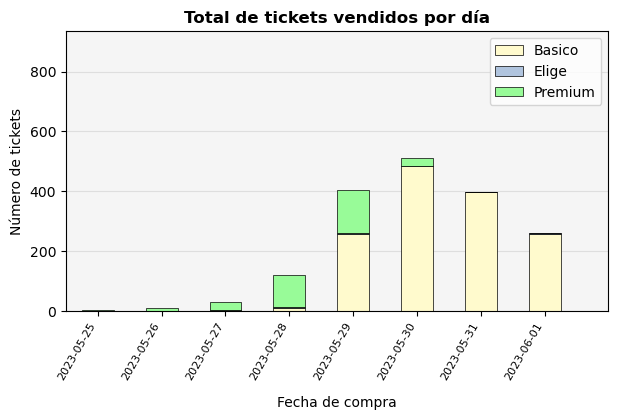

In [7]:
kernel_plotter.plot_tickets_by_date(y_limit=850, save_path=f'{SAVE_PATH}/total_tickets_sold.png')

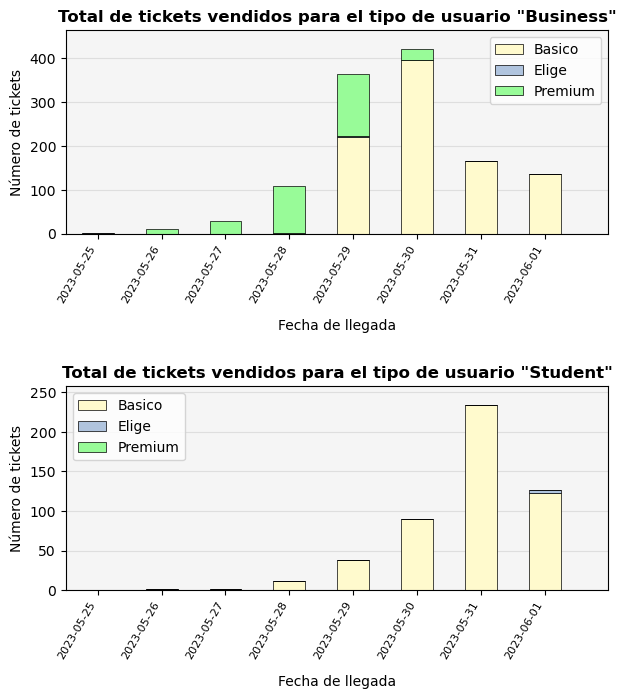

In [8]:
kernel_plotter.plot_tickets_by_user(save_path=f'{SAVE_PATH}/tickets_sold_per_usertype.png')

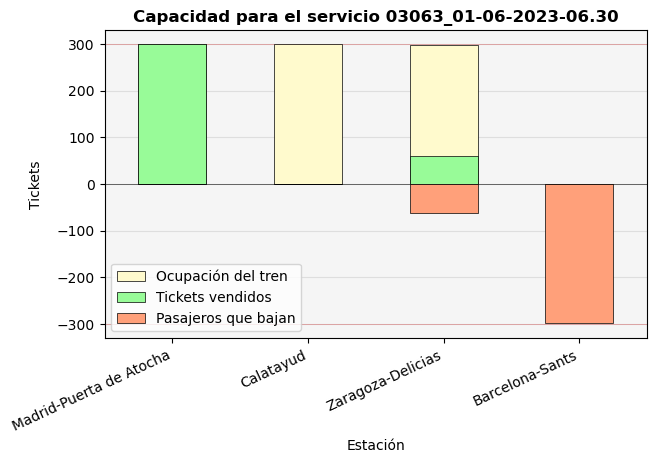

In [9]:
kernel_plotter.plot_service_capacity(
    service_id='03063_01-06-2023-06.30',
    save_path=f'{SAVE_PATH}/capacity_03063_01-06-2023-06.30.png'
)

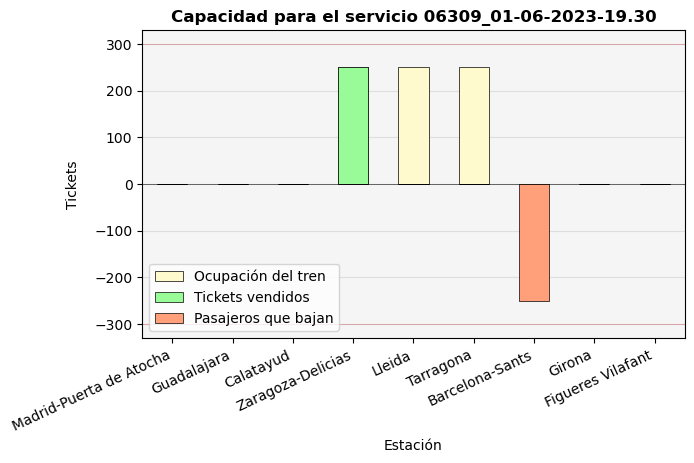

In [10]:
kernel_plotter.plot_service_capacity(
    service_id='06309_01-06-2023-19.30',
    save_path=f'{SAVE_PATH}/capacity_06309_01-06-2023-19.30.png'
)

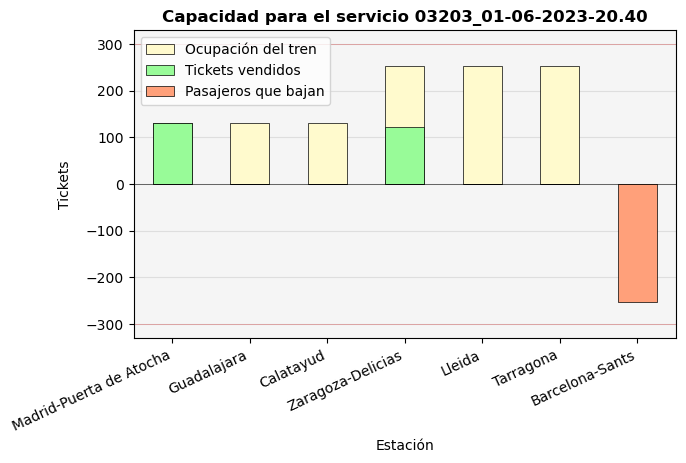

In [11]:
kernel_plotter.plot_service_capacity(
    service_id='03203_01-06-2023-20.40',
    save_path=f'{SAVE_PATH}/capacity_03203_01-06-2023-20.40.png'
)

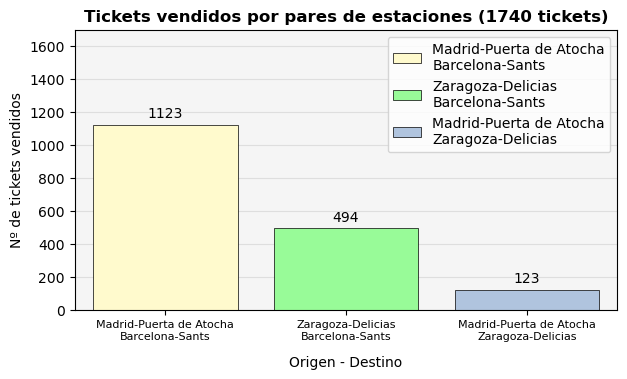

In [12]:
kernel_plotter.plot_tickets_by_pair(y_limit=1700, save_path=f'{SAVE_PATH}/pairs.png')